Creating a simple categorical heatmap of Estonian production companies producing newsreels. (following the example from here: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html )

TypeError: ignored

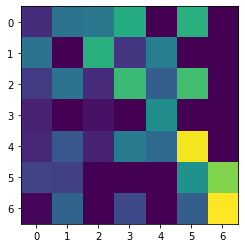

In [1]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)), labels=farmers)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

(From this onwards copy of scraping code)

In [ ]:
# Mount google drive folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import json
import pandas as pd
import time
import os

not_finished_reels = ['soviet_patriot', 'on_steel_lines', 'ural_chronicle', 'master', 'great_ural', 'tatarstan', 'health',
 'soviet_cinema', 'foreign_chronicle', 'secrets_of_nature', 'on_the_seas_and_oceans', 'agriculture', 'zheleznodorozhnik',
 'friendship_of_nations', 'cooperator', 'fishermen_on_the_workload', 'north_caucasus', 'on_air_routes', 'coeval', 'faces_of_russia',
 'art', 'our_epoch', 'stalin_ural', 'small_wonders_of_big_nature', 'Construction_news', 'soviet_tatarstan',
 'russian_the_agroindustrial_complex', 'on_blue_roads', 'leningrad_newsreel', 'making_a_movie', 'eureka', 'ordenonaya_сhuvashia',
 'contemporary', 'soviet_art', 'country_of_the_soviet', 'soviet_tataria', 'tyumen_region', 'parma_yol']


In [ ]:
# function for downloading video file
import urllib.request
import requests

def downloadfile(fname, idx, url):
    r=requests.get(url)
    
    f=open(fname,'wb');
    for chunk in r.iter_content(chunk_size=1024*1024): 
        if chunk: # filter out keep-alive new chunks
            f.write(chunk)
    f.close()


# You need to change paths to source and videos
You can see my folder struscture below. Your path starts right after My Drive and goes until the very end to csv files and videos.

**path_to_source_files** is the path to these csv files [LINK](https://drive.google.com/drive/folders/120vd7Z_ZibNPkV1PXUqAGf5ECuKdZA-r?usp=sharing)

**path_to_videos** is the folder where all videos will be.

Do not forget about backslash symbols!

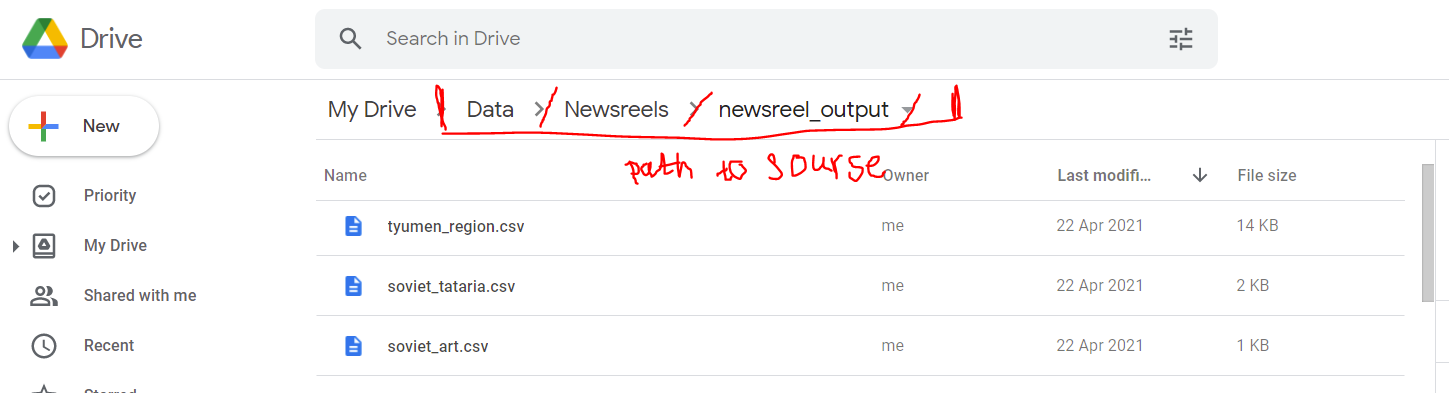

In [ ]:
path_to_google_drive_root = '/content/drive/MyDrive/'
path_to_source_files = 'Soviet Newsreels/Newsreels metadata/csv/' #I assume this should be 'Soviet Newsreels/Newsreels metadata/csv/' 
path_to_videos = 'Soviet Newsreels/Newsreels video/' #Probably 'Soviet Newsreels/Newsreels video/' 



In [ ]:
for i in range(len(not_finished_reels)):
  news_film = pd.read_csv(path_to_google_drive_root + path_to_source_files + not_finished_reels[i] + '.csv')

  #create folder for videos if not exist
  if not os.path.exists(path_to_google_drive_root + path_to_videos + not_finished_reels[i]):
      os.makedirs(path_to_google_drive_root + path_to_videos + not_finished_reels[i])
  
  count = 1
  for k, row in news_film.iterrows():    
    fname = path_to_google_drive_root + path_to_videos + not_finished_reels[i] + '/' + str(row['ID']) + ".mp4"
    if os.path.isfile(fname):
      count += 1
      continue
    else: 
      print(count, 'out of ', len(news_film))
      if row['Media'] == 'https:/img/notDigitized.mp4':
        count += 1
        continue
      media_link = 'https://d1.net-film.ru/web-tc-mp4/' + row['Media'].split('/')[-1]
     # urllib.request.urlretrieve(media_link, fname) 
      downloadfile(fname, k, media_link)
      print('Processed:', row['ID'], media_link)
      time.sleep(120)

    count += 1


1 out of  4
Processed: 97318 https://d1.net-film.ru/web-tc-mp4/fs124229.mp4
2 out of  4
Processed: 60079 https://d1.net-film.ru/web-tc-mp4/fs63717.mp4
3 out of  4
Processed: 49605 https://d1.net-film.ru/web-tc-mp4/fs58655.mp4
4 out of  4
Processed: 31616 https://d1.net-film.ru/web-tc-mp4/fs25539.mp4
1 out of  3
Processed: 49154 https://d1.net-film.ru/web-tc-mp4/fs48591.mp4
2 out of  3
Processed: 49155 https://d1.net-film.ru/web-tc-mp4/fs48589.mp4
3 out of  3
Processed: 49156 https://d1.net-film.ru/web-tc-mp4/fs48586.mp4
1 out of  3
Processed: 55320 https://d1.net-film.ru/web-tc-mp4/fs104697.mp4
2 out of  3
Processed: 55321 https://d1.net-film.ru/web-tc-mp4/fs41871.mp4
3 out of  3
Processed: 52262 https://d1.net-film.ru/web-tc-mp4/fs39619.mp4
1 out of  3
Processed: 58653 https://d1.net-film.ru/web-tc-mp4/fs58634.mp4
2 out of  3
Processed: 58651 https://d1.net-film.ru/web-tc-mp4/fs58592.mp4
3 out of  3
Processed: 58521 https://d1.net-film.ru/web-tc-mp4/fs58033.mp4
1 out of  3
Processed: 